In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/User/Documents/real_estate.csv")

In [3]:
data

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1401061,for_sale,NaN,NaN,155.00,Perrysburg,New York,14129.0,NaN,NaN,325000.0
1401062,for_sale,4.0,2.0,0.36,Silver Creek,New York,14136.0,2026.0,2000-09-01,187900.0
1401063,for_sale,10.0,4.0,0.43,Brocton,New York,14716.0,4802.0,1994-12-01,120000.0
1401064,for_sale,2.0,2.0,0.14,Dunkirk,New York,14048.0,1568.0,2003-04-15,92000.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401066 entries, 0 to 1401065
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   status          1401066 non-null  object 
 1   bed             1184538 non-null  float64
 2   bath            1206853 non-null  float64
 3   acre_lot        1043599 non-null  float64
 4   city            1400875 non-null  object 
 5   state           1401066 non-null  object 
 6   zip_code        1400587 non-null  float64
 7   house_size      950954 non-null   float64
 8   prev_sold_date  714773 non-null   object 
 9   price           1400958 non-null  float64
dtypes: float64(6), object(4)
memory usage: 106.9+ MB


In [5]:
data.nunique()

status                2
bed                  48
bath                 42
acre_lot           4488
city               3512
state                19
zip_code           4220
house_size         6855
prev_sold_date    10319
price              8735
dtype: int64

In [6]:
data.isnull().sum()

status                 0
bed               216528
bath              194213
acre_lot          357467
city                 191
state                  0
zip_code             479
house_size        450112
prev_sold_date    686293
price                108
dtype: int64

In [7]:
(data.isnull().sum()/(len(data)))*100

status             0.000000
bed               15.454518
bath              13.861802
acre_lot          25.513930
city               0.013632
state              0.000000
zip_code           0.034188
house_size        32.126395
prev_sold_date    48.983631
price              0.007708
dtype: float64

In [8]:
data = data.drop(["city","zip_code","prev_sold_date"], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401066 entries, 0 to 1401065
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   status      1401066 non-null  object 
 1   bed         1184538 non-null  float64
 2   bath        1206853 non-null  float64
 3   acre_lot    1043599 non-null  float64
 4   state       1401066 non-null  object 
 5   house_size  950954 non-null   float64
 6   price       1400958 non-null  float64
dtypes: float64(5), object(2)
memory usage: 74.8+ MB


In [9]:
data = data.drop(data[data["price"].isnull()].index)

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
bed,1184467.0,3.392345,2.051909e+00,1.0,2.00,3.00,4.00,123.0
bath,1206853.0,2.487426,1.873599e+00,1.0,2.00,2.00,3.00,198.0
acre_lot,1043599.0,32.150131,1.249983e+03,0.0,0.12,0.32,1.34,100000.0
house_size,950881.0,2178.595242,3.492627e+03,4.0,1170.00,1700.00,2500.00,1450112.0
price,1400958.0,818602.892286,2.683069e+06,0.0,235000.00,446777.00,795000.00,875000000.0


In [11]:
data = data[~(data.isna().sum(axis=1) >= 2)]
((data.isna().sum() / len(data)) * 100).sort_values(ascending=False)

acre_lot      21.114447
house_size    15.602307
bed            0.555776
bath           0.377693
status         0.000000
state          0.000000
price          0.000000
dtype: float64

In [12]:
data = data.drop(data[data['bed'].isnull()].index, axis=0)
data = data.drop(data[data['bath'].isnull()].index, axis=0)

In [13]:
data["status"].value_counts()

status
for_sale    1081437
Name: count, dtype: int64

In [14]:
data = data.drop("status", axis=1)

In [15]:
data["state"].value_counts()

state
New York          481214
New Jersey        209056
Massachusetts     149608
Connecticut        86604
New Hampshire      32171
Vermont            29284
Rhode Island       28206
Maine              24555
Puerto Rico        21241
Pennsylvania       16771
Delaware            1929
Virgin Islands       742
Georgia               48
West Virginia          5
Wyoming                3
Name: count, dtype: int64

In [16]:
data= data.drop(data[data["state"].map(data["state"].value_counts()) < 50] ["state"].index)

In [17]:
data["state"].unique()

array(['Puerto Rico', 'Virgin Islands', 'Massachusetts', 'Connecticut',
       'New Jersey', 'New York', 'New Hampshire', 'Vermont',
       'Rhode Island', 'Maine', 'Pennsylvania', 'Delaware'], dtype=object)

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data["state_num"] = label_encoder.fit_transform(data['state'])
data = data.drop("state", axis = 1)
data

,bed,bath,acre_lot,house_size,price,state_num
0,3.0,2.0,0.12,920.0,105000.0,8
1,4.0,2.0,0.08,1527.0,80000.0,8
2,2.0,1.0,0.15,748.0,67000.0,8
3,4.0,2.0,0.10,1800.0,145000.0,8
4,6.0,2.0,0.05,NaN,65000.0,8
...,...,...,...,...,...,...
1401060,3.0,1.0,0.10,1002.0,29900.0,6
1401062,4.0,2.0,0.36,2026.0,187900.0,6
1401063,10.0,4.0,0.43,4802.0,120000.0,6
1401064,2.0,2.0,0.14,1568.0,92000.0,6


In [19]:
num_to_state = {label: state for label, state in enumerate(label_encoder.classes_)}

# Print the number assigned to each state
print(num_to_state)

{0: 'Connecticut', 1: 'Delaware', 2: 'Maine', 3: 'Massachusetts', 4: 'New Hampshire', 5: 'New Jersey', 6: 'New York', 7: 'Pennsylvania', 8: 'Puerto Rico', 9: 'Rhode Island', 10: 'Vermont', 11: 'Virgin Islands'}


In [20]:
data.describe()

,bed,bath,acre_lot,house_size,price,state_num
count,1.081381e+06,1.081381e+06,850938.000000,9.110620e+05,1.081381e+06,1.081381e+06
mean,3.495425e+00,2.568830e+00,30.843521,2.165486e+03,8.842359e+05,4.996659e+00
std,2.004882e+00,1.859182e+00,1232.124015,3.444759e+03,2.919985e+06,2.149666e+00
min,1.000000e+00,1.000000e+00,0.000000,4.000000e+00,1.000000e+00,0.000000e+00
25%,2.000000e+00,2.000000e+00,0.110000,1.180000e+03,2.799000e+05,4.000000e+00
50%,3.000000e+00,2.000000e+00,0.240000,1.700000e+03,4.899000e+05,6.000000e+00
75%,4.000000e+00,3.000000e+00,0.790000,2.499000e+03,8.315000e+05,6.000000e+00
max,9.900000e+01,1.980000e+02,100000.000000,1.450112e+06,8.750000e+08,1.100000e+01


<AxesSubplot: >

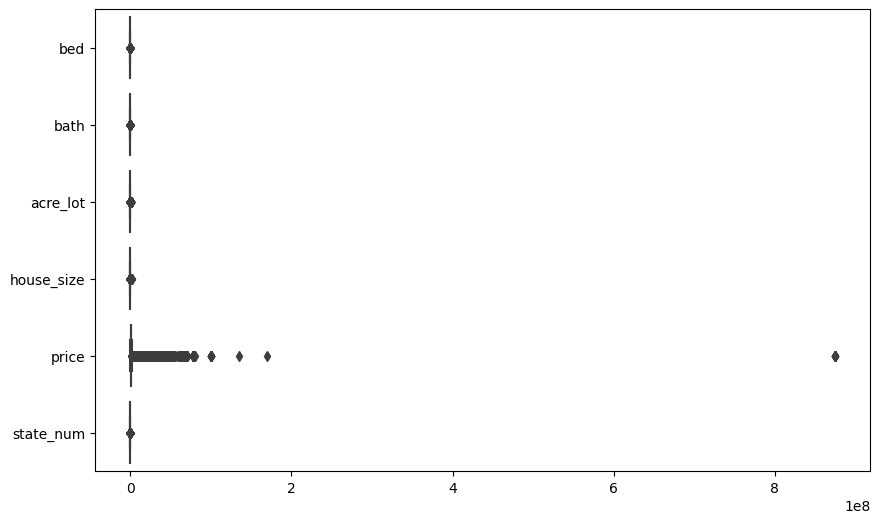

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, orient="h")

In [22]:
q95, q25 = np.percentile(data["price"], [95,25])
iqrmax = q95 + q25
iqrmax

2929900.0

In [23]:
len(data[data["price"]>2929900.0]) / len(data["price"].index) * 100

4.355356715163296

In [24]:
data = data.drop(data[data["price"]>2929900.0].index)

<AxesSubplot: xlabel='price'>

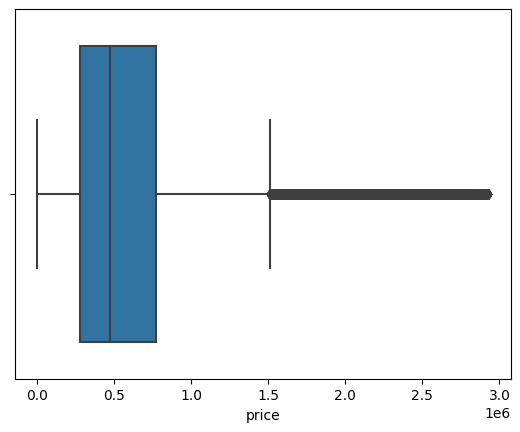

In [25]:
sns.boxplot(data=data, x = "price")

<AxesSubplot: xlabel='acre_lot'>

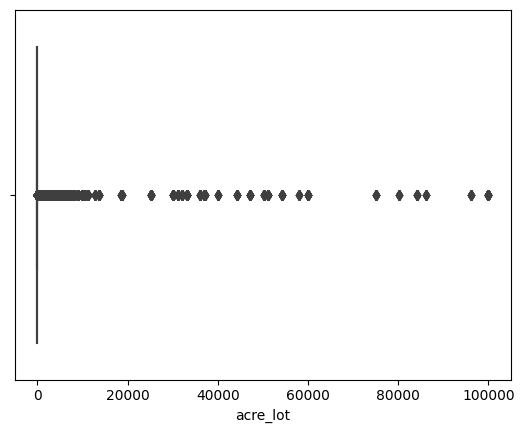

In [26]:
sns.boxplot(data=data, x = "acre_lot")

In [27]:
len(data[data["acre_lot"] > 200]) / len(data["acre_lot"].index) * 100


0.2104839777894445

In [28]:
data = data.drop(data[data["acre_lot"]>200].index)

<AxesSubplot: xlabel='acre_lot'>

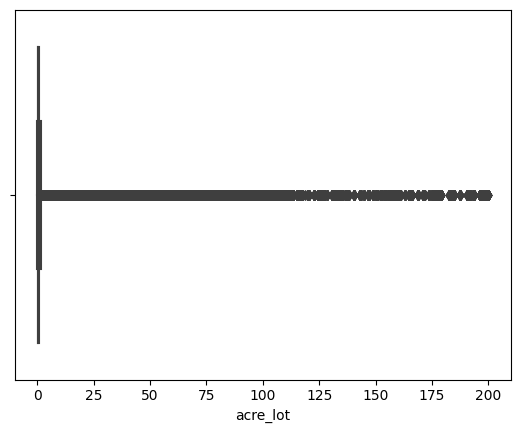

In [29]:
sns.boxplot(data=data, x="acre_lot")

In [30]:
len(data[data["house_size"] >= 20000]) / len(data["house_size"].index) * 100

0.10183062592408144

In [31]:
data = data.drop(data[data["house_size"] >= 20000].index, axis=0)

<AxesSubplot: xlabel='house_size'>

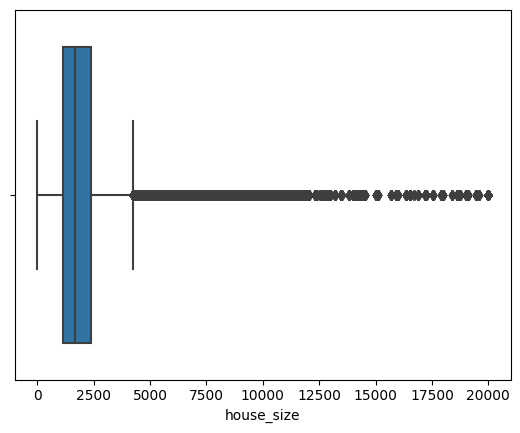

In [32]:
sns.boxplot(data=data, x ="house_size")

In [33]:
data.isna().sum().sort_values(ascending = False)

acre_lot      209087
house_size    166203
bed                0
bath               0
price              0
state_num          0
dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
new_data = data[data["house_size"].notna()]

In [36]:
# Make data without acre-lot
filled_data = new_data.dropna(subset=["acre_lot"])
# Make data with acre-lot where values in NaN
missing_data = data[data['acre_lot'].isna()]
# Make data without acre-lot from missing_data
predict_data = missing_data.drop("acre_lot", axis=1)

In [37]:
scaler = StandardScaler()
scaler.fit(filled_data.drop("acre_lot", axis = 1))

predict_data = scaler.transform(predict_data)

In [38]:
X = scaler.transform(filled_data.drop("acre_lot", axis=1))
y = filled_data["acre_lot"]

In [39]:
KNN = KNeighborsRegressor()

n_list = list(range(1,10))
param_grid_knn = {"n_neighbors": n_list}

In [40]:
grid_knn = GridSearchCV(KNN, param_grid_knn)

In [41]:
grid_knn.fit(X,y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [42]:
grid_knn.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [43]:
preds = grid_knn.predict(predict_data)

In [44]:
data.loc[data['acre_lot'].isna(), 'acre_lot'] = preds

In [45]:
((data.isna().sum()/len(data))*100).sort_values(ascending=False)

house_size    16.119703
bed            0.000000
bath           0.000000
acre_lot       0.000000
price          0.000000
state_num      0.000000
dtype: float64

In [46]:
filled_data = data.dropna(subset=["house_size"])
missing_data = data[data['house_size'].isna()]
predict_data = missing_data.drop("house_size", axis=1)

In [47]:
scaler = StandardScaler()
scaler.fit(filled_data.drop("house_size", axis=1))

predict_data = scaler.transform(predict_data)

In [48]:
X = scaler.transform(filled_data.drop("house_size", axis=1))
y = filled_data["house_size"]

In [49]:
KNN = KNeighborsRegressor()

n_list = list(range(1,10))
param_grid_knn = {"n_neighbors": n_list}

grid_knn = GridSearchCV(KNN, param_grid_knn)

In [50]:
grid_knn.fit(X,y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [51]:
grid_knn.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

In [52]:
preds = grid_knn.predict(predict_data)

In [53]:
data.loc[data['house_size'].isna(), 'house_size'] = preds

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1031055 entries, 0 to 1401065
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bed         1031055 non-null  float64
 1   bath        1031055 non-null  float64
 2   acre_lot    1031055 non-null  float64
 3   house_size  1031055 non-null  float64
 4   price       1031055 non-null  float64
 5   state_num   1031055 non-null  int32  
dtypes: float64(5), int32(1)
memory usage: 51.1 MB


In [55]:
data

,bed,bath,acre_lot,house_size,price,state_num
0,3.0,2.0,0.12,920.0,105000.0,8
1,4.0,2.0,0.08,1527.0,80000.0,8
2,2.0,1.0,0.15,748.0,67000.0,8
3,4.0,2.0,0.10,1800.0,145000.0,8
4,6.0,2.0,0.05,1500.0,65000.0,8
...,...,...,...,...,...,...
1401060,3.0,1.0,0.10,1002.0,29900.0,6
1401062,4.0,2.0,0.36,2026.0,187900.0,6
1401063,10.0,4.0,0.43,4802.0,120000.0,6
1401064,2.0,2.0,0.14,1568.0,92000.0,6


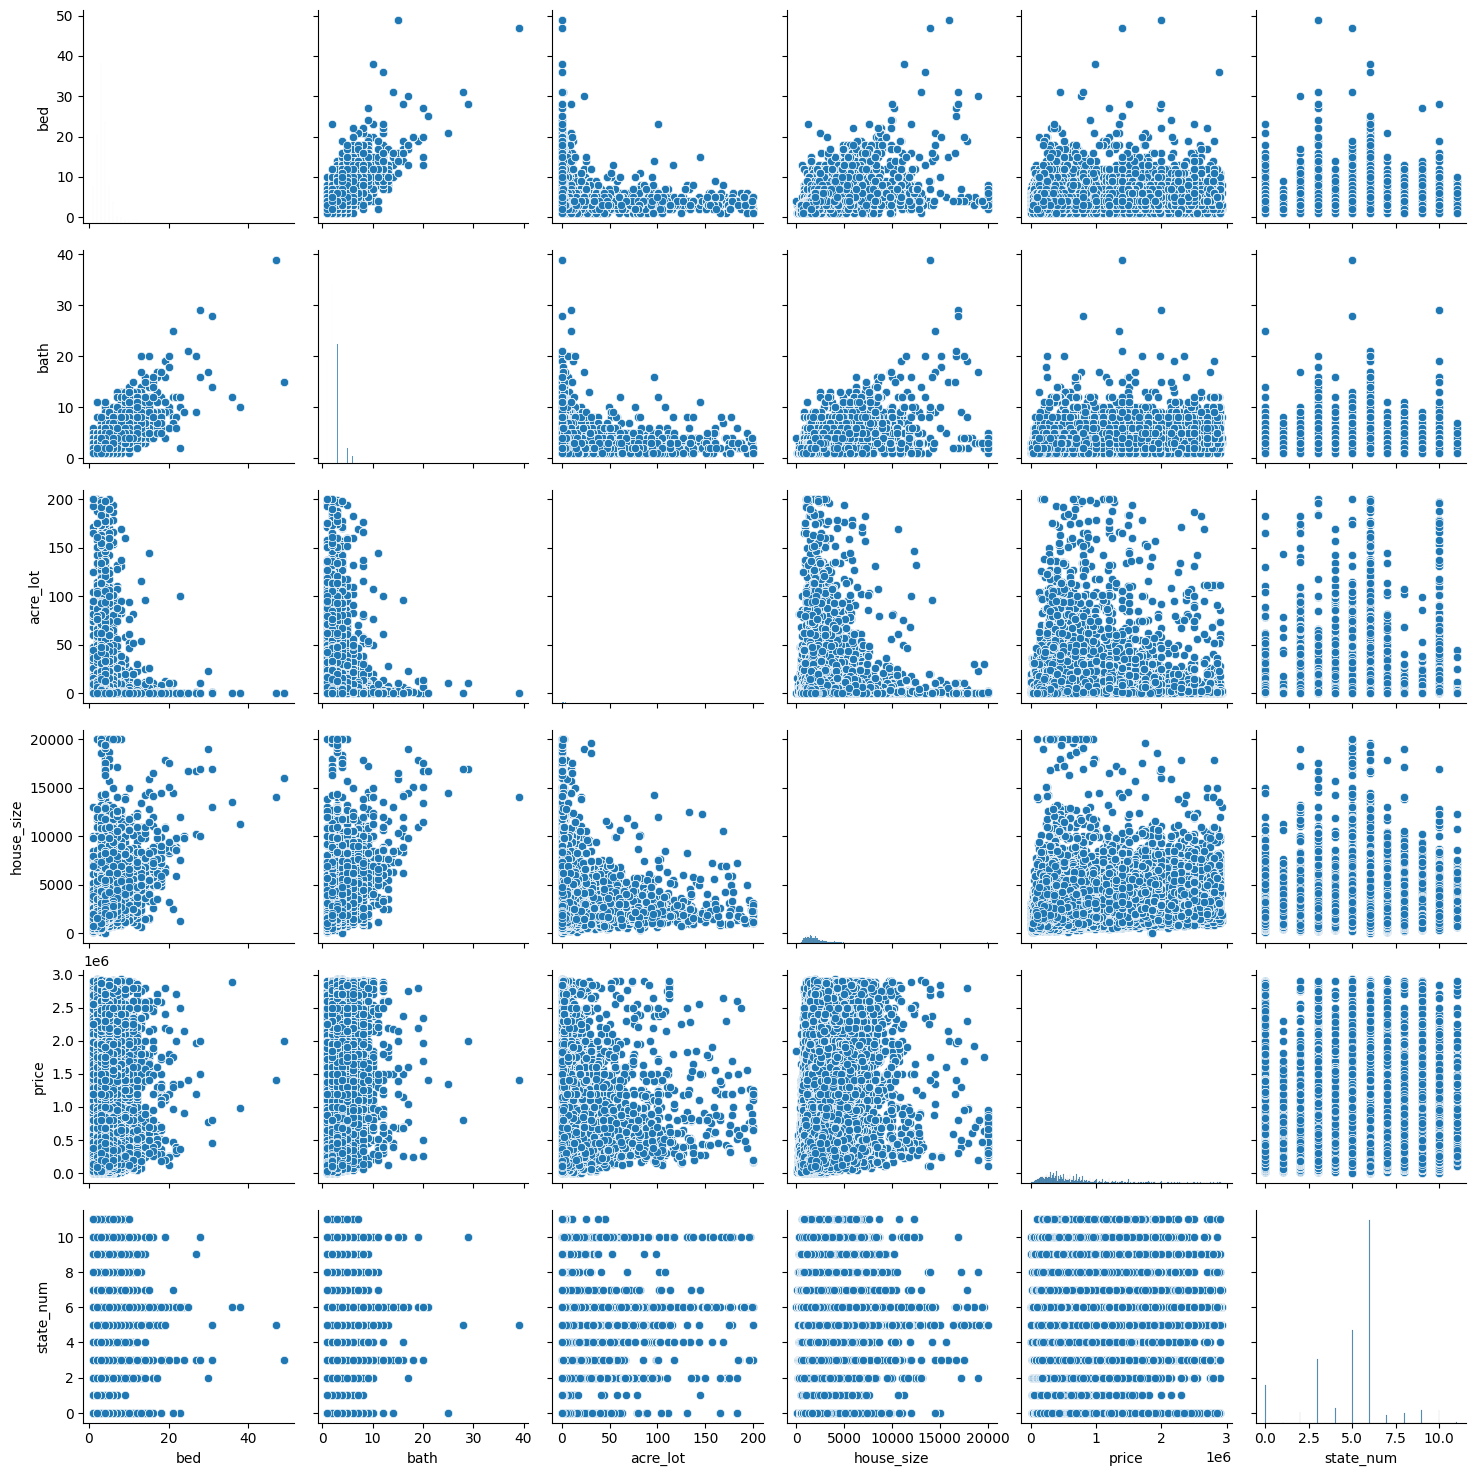

In [56]:
sns.pairplot(data)

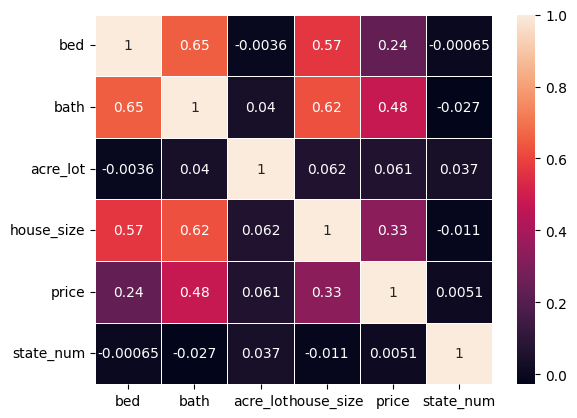

In [57]:
sns.heatmap(data.corr(), annot=True, linewidths=0.5);

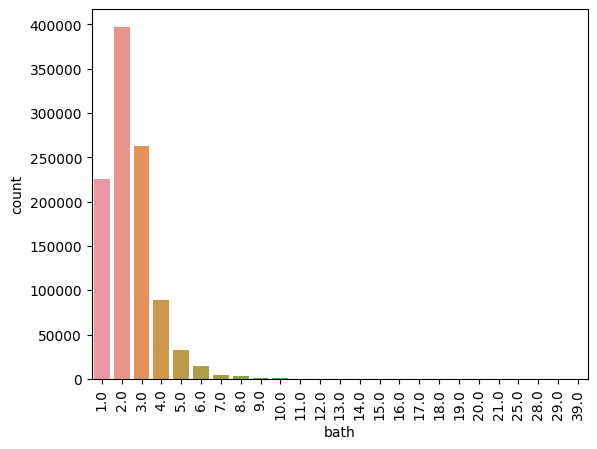

In [58]:
sns.countplot(data=data, x="bath")
plt.xticks(rotation=90);

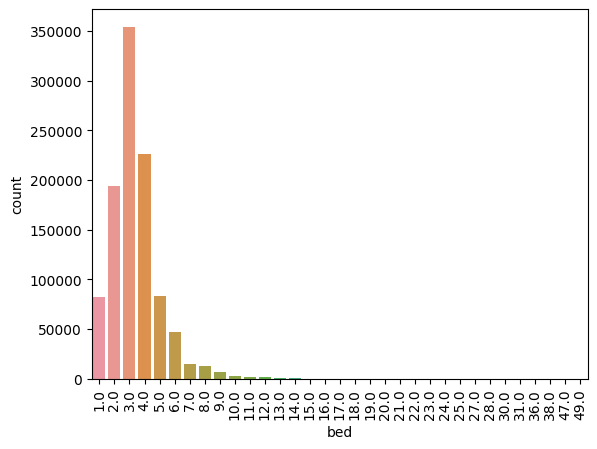

In [59]:
sns.countplot(data=data, x="bed")
plt.xticks(rotation=90);

<AxesSubplot: xlabel='house_size', ylabel='Count'>

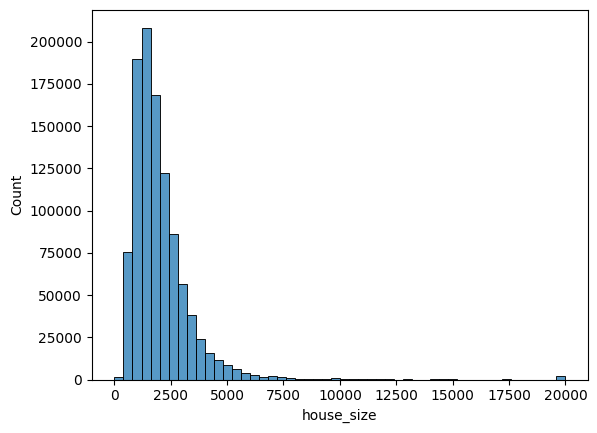

In [60]:
sns.histplot(data=data, x="house_size", bins=50)

<AxesSubplot: xlabel='price', ylabel='Count'>

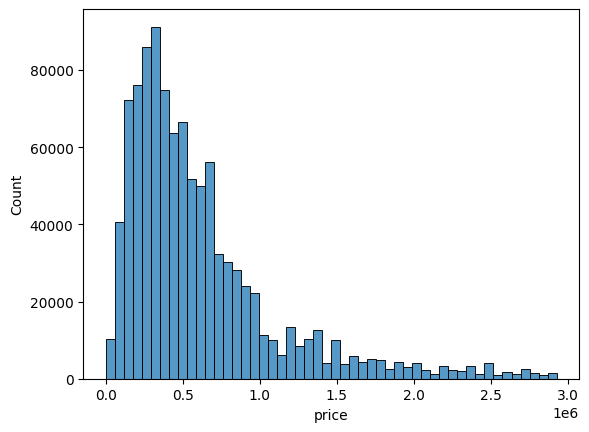

In [61]:
sns.histplot(data=data, x="price", bins=50)

In [62]:
print(num_to_state)
data.groupby("state_num")[["price", "house_size", "bed", "bath"]].mean().sort_values(ascending=False, by="price").round(2)

{0: 'Connecticut', 1: 'Delaware', 2: 'Maine', 3: 'Massachusetts', 4: 'New Hampshire', 5: 'New Jersey', 6: 'New York', 7: 'Pennsylvania', 8: 'Puerto Rico', 9: 'Rhode Island', 10: 'Vermont', 11: 'Virgin Islands'}


,price,house_size,bed,bath
state_num,,,,
11,859027.33,3072.77,3.57,3.11
3,778621.18,2044.79,3.37,2.45
6,667689.44,1892.63,3.36,2.34
5,573563.71,2318.74,3.53,2.58
4,524824.64,2128.56,3.14,2.42
10,511153.48,2262.91,3.46,2.63
9,468068.17,2120.93,3.58,2.29
0,449495.20,2010.32,3.48,2.53
2,445221.98,2028.13,3.46,2.24


In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [64]:
X = data.drop("price", axis=1)
y = data["price"]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [66]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
abr = AdaBoostRegressor()

In [68]:
param_grid_rfr = {"n_estimators":[72, 100, 128], "max_features":[2,3,4]}

In [69]:
param_grid_gbr = {"n_estimators":[72, 100, 128], "learning_rate":[0.1, 0.05, 0.2],
                  "max_depth":[3,4,5]}

In [70]:
param_grid_abr = {"n_estimators":[5, 10, 15, 25, 40], "learning_rate":[0.1, 0.05, 0.2]}

In [71]:
grid_rfr = GridSearchCV(rfr, param_grid_rfr)

grid_gbr = GridSearchCV(gbr, param_grid_gbr)

grid_abr = GridSearchCV(abr, param_grid_abr)

In [72]:
grid_rfr.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 3, 4],
                         'n_estimators': [72, 100, 128]})

In [73]:
grid_gbr.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [72, 100, 128]})

In [74]:
grid_abr.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'n_estimators': [5, 10, 15, 25, 40]})

In [75]:
preds_gbr = grid_gbr.predict(X_test)
preds_rfr = grid_rfr.predict(X_test)
preds_abr = grid_abr.predict(X_test)

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [77]:
print(f"Best Parameters grid_rfr: {grid_rfr.best_params_}\n")
print(f"Best Parameters grid_gbr: {grid_gbr.best_params_}\n")
print(f"Best Parameters grid_abr: {grid_abr.best_params_}\n")

Best Parameters grid_rfr: {'max_features': 2, 'n_estimators': 128}

Best Parameters grid_gbr: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 128}

Best Parameters grid_abr: {'learning_rate': 0.2, 'n_estimators': 10}



In [78]:
def measures(predictions):
    MAE = mean_absolute_error(y_test, predictions).round(3)
    MSE = mean_squared_error(y_test, predictions).round(3)
    RMSE = np.sqrt(mean_squared_error(y_test, predictions)).round(3)
    print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE} \n")
    sns.kdeplot(data=predictions, label="Predicted")
    sns.kdeplot(data=y_test, label="Actual")
    plt.legend();

MAE: 17562.626, MSE: 6724863748.771, RMSE: 82005.267 



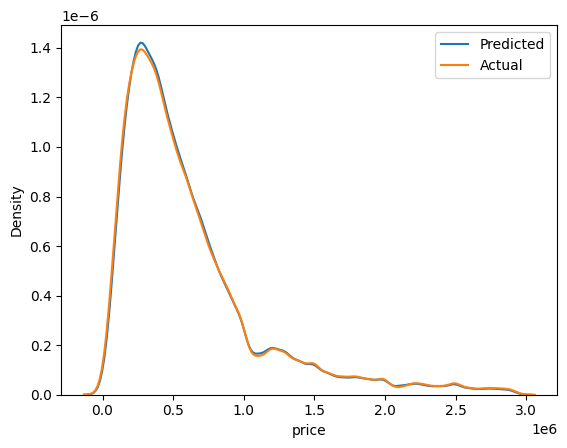

In [79]:
# RandomForestRegressor
measures(preds_rfr)

MAE: 236822.124, MSE: 125486282214.086, RMSE: 354240.43 



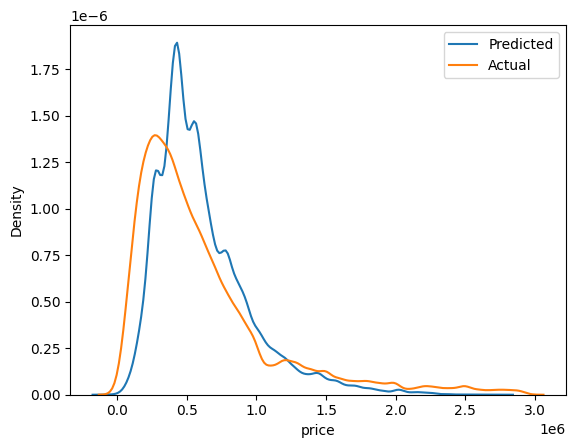

In [80]:
# GradientBoostingRegressor
measures(preds_gbr)

MAE: 317361.619, MSE: 192071236318.529, RMSE: 438259.325 



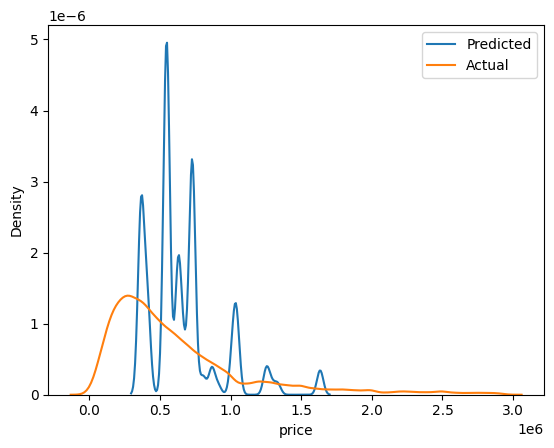

In [81]:
# AdaBoostRegressor
measures(preds_abr)

CPU times: total: 0 ns
Wall time: 0 ns
